# 02 Experiement on Data Exploration and Loading and Pre-processing <br>(with explanation)


In [1]:
import numpy as np
import mne
import os
import sys
from mne.datasets import eegbci
import glob

## EEG Motor Movement/Imagery Dataset

1. https://www.physionet.org/content/eegmmidb/1.0.0/
2. Schalk, G., McFarland, D.J., Hinterberger, T., Birbaumer, N., Wolpaw, J.R. BCI2000: A General-Purpose Brain-Computer Interface (BCI) System. IEEE Transactions on Biomedical Engineering 51(6):1034-1043, 2004
3. https://mne.tools/stable/auto_examples/index.html

## **NOTE**

This experiment based on folder structure this


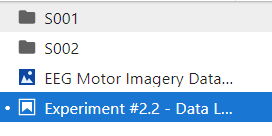 <br>
to be more clear whenever os.path is applied to read files

# (Introduction) Data Structure Exploration of EEG edf file

The dataloading step is to explore the structure of raw eeg sifnal file. The selected dataset contains information by following

* Experiment has 14 subjects (14 persons)
* Each subject has 14 runs (14 tests)
* Each run has 30


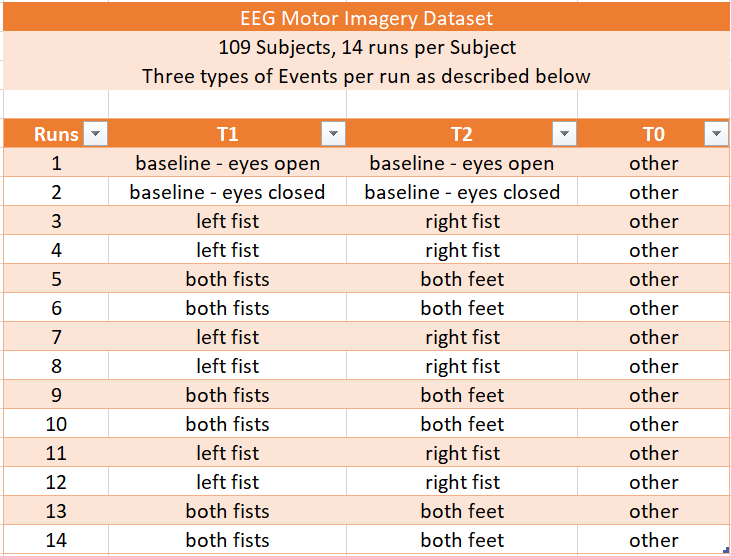

Therefore, the files required for the study are runs number 3, 5, 8, 11 and 14. Then, let's create the list of target file directory

In [2]:
dataset_path = os.path.join(os.getcwd(),"S001")

included_extensions = ['edf']
edf_filenames = [fn for fn in os.listdir(dataset_path)
              if any(fn.endswith(ext) for ext in included_extensions)]

edf_filenames = sorted(edf_filenames)

In [3]:
edf_filenames

['S001R01.edf',
 'S001R02.edf',
 'S001R03.edf',
 'S001R04.edf',
 'S001R05.edf',
 'S001R06.edf',
 'S001R07.edf',
 'S001R08.edf',
 'S001R09.edf',
 'S001R10.edf',
 'S001R11.edf',
 'S001R12.edf',
 'S001R13.edf',
 'S001R14.edf']

After creating target edf file names, we would like to loop the raw file read to keep in list of raw MNE object

In [4]:
raw_eeg = [] # declare list of mne raw object to save that 5 files

for i in range(len(edf_filenames)): # for each filename
    
    path = os.path.join(dataset_path, edf_filenames[i]) # make full path for reading
    
    print(f'read raw file {i}/{len(edf_filenames)} file: {path}') # show file to be read
    
    raw_eeg.append(mne.io.read_raw_edf(path , verbose='WARNING' )) # read the raw file and keep it in list


read raw file 0/14 file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R01.edf
read raw file 1/14 file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R02.edf
read raw file 2/14 file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R03.edf
read raw file 3/14 file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R04.edf
read raw file 4/14 file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R05.edf
read raw file 5/14 file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R06.edf
read raw file 6/14 file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R07.edf
read raw file 7/14 file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R08.edf
read raw file 8/14 file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R09.edf
read raw file 9/14 file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R10.edf
read raw file 10/14 file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R11.edf
read raw 

## Attributes of raw object
From raw file reading, we have to explore the attributes of the raw object class

In [5]:
print(dir(raw_eeg[0].annotations))

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_any_ch_names', '_orig_time', '_prune_ch_names', '_sort', 'append', 'ch_names', 'copy', 'crop', 'delete', 'description', 'duration', 'onset', 'orig_time', 'save', 'to_data_frame']


# (Introduction) Data Structure Exploratory

After we can read the raw .edf file, let's explore how the data looks like and what are the compositions of data structures. By the way, We prefer to select run number 6 (both fist and both feet with eye closed imagery) to show how can we familirize the data

## Explore description of each events

As picture above, the <code>description</code> means the event that subject perform on experiment. T0 is none related event, T1 is fists imagery movement and T2 is feet imagery movment. All events are 30.

In [6]:
print(raw_eeg[6].annotations.description)

['T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2'
 'T0' 'T1' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1'
 'T0' 'T1']


## Explore duration of recording for each events

For each event, there is a record duration by <code>duration</code> attribute to show how long record of each event

In [7]:
print(raw_eeg[6].annotations.duration)

[4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1
 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1]


## Explore starting time of each events

<code> onset </code> is to show the strating time of event performed of subject.

In [8]:
print(raw_eeg[6].annotations.onset)

[  0.    4.2   8.3  12.5  16.6  20.8  24.9  29.1  33.2  37.4  41.5  45.7
  49.8  54.   58.1  62.3  66.4  70.6  74.7  78.9  83.   87.2  91.3  95.5
  99.6 103.8 107.9 112.1 116.2 120.4]


## Explore channel names (Electrode attached)

we can use <code>ch_names</code> attruibute to show electrode names

In [9]:
print(raw_eeg[6].ch_names)

['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


However, the channels positions and names are not stadardized yet. we have to simply do by

In [10]:
eegbci.standardize(raw_eeg[6])

Then, we got stadardized channels names and position of electrodes

In [11]:
print(raw_eeg[6].ch_names)  

['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']


## Explore time of recording of dataset

In [12]:
print(raw_eeg[6].annotations.orig_time)

2009-08-12 16:15:00+00:00


## Show information of recording

In [13]:
print(raw_eeg[6].info)

<Info | 7 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>


# (Experiment) EEG Signal Preprocessing

This step is to do preprocessing the signal. There are 4 steps to be done per subject.

1. Load raw file
2. Standardize channels
3. Notch filtering
4. Band pass filtering

Therefore, to be more simple, let's make a function to do that file by file

## 1. Preprocessing EEG signal bby EDF files

The function receive list of subject number and list of runs. However, the subject folders should be the same location as this file

In [14]:
def load_preprocess(subject_list, run_list):
    
    raw_eegs = []
    
    # go to S001... S109 directory
    subject_path = os.path.join(os.getcwd())
    
    # generate list of wanted subjects
    subject_dir = [fn for fn in os.listdir(subject_path) if fn.startswith('S0')]
    subject_dir = sorted(subject_dir)
    subject_dir = [subject_dir[i-1] for i in range(1, len(subject_dir)+1) if i in subject_list]
    
    for subject in subject_dir:
        
        run_files = [fn for fn in os.listdir(os.path.join(subject_path, subject))
                  if fn.endswith('.edf')]

        run_files = sorted(run_files)
        run_files = [run_files[i-1] for i in range(1, len(run_files)+1) if i in run_list]
        
        for run in run_files:
            
            file_path = os.path.join(subject_path, subject, run)
            print(f'read file: {file_path}')
            raw_eegs.append(mne.io.read_raw_edf( file_path , preload=True, verbose='WARNING' ))
            
    print('concat raw, standardize and filter ....', sep='')
    raw = mne.io.concatenate_raws(raw_eegs) # concat each raw together
    eegbci.standardize(raw) # standardize the channels
    raw.filter(1,35, fir_design='firwin')  # Remove higher frequencies as they are redundant for analysis. 
    print('completed')
    
    return raw

In [15]:
raw = load_preprocess([1,2], [6,10,14])

read file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R06.edf
read file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R10.edf
read file: /home/st122097/work/AT82.01 Python_DSAI/Project/S001/S001R14.edf
read file: /home/st122097/work/AT82.01 Python_DSAI/Project/S002/S002R06.edf
read file: /home/st122097/work/AT82.01 Python_DSAI/Project/S002/S002R10.edf
read file: /home/st122097/work/AT82.01 Python_DSAI/Project/S002/S002R14.edf
concat raw, standardize and filter ....
completed


In [16]:
# def load_eeg(subjects, runs):    #load -> standardize -> notch_filter -> bandpass filter -> return
    
#     # join path of the raw file
#     subject_path = os.path.join(os.getcwd())
    
#     subject
#     edf_filenames = file.readlines()
#     file.close()

    
#     edf_filenames = [fname.rstrip() for fname in edf_filenames]
    
#     #print(edf_filenames)
#     fno = []
#     subjects = [s-1 for s in subjects]  # start from 0, 1, 2, ...
#     for subject in subjects:
#         for run in runs:
#             fno.append(subject*14+run-1)   # 14 runs per subject
            
#     #print(edf_filenames)
#     print('Loading files at index:', fno)
#     raw_eegs = []
#     for idx,i in enumerate(fno):
#         path = os.path.join(dataset_path, edf_filenames[i])
#         sys.stdout.write(f"\rLoading file #{idx+1}/{len(fno)}: {path}")
#         raw = mne.io.read_raw_edf( path , preload=True, verbose='WARNING' )
#         raw_eegs.append(raw)
        
#     raw = mne.io.concatenate_raws(raw_eegs)     # Concatenate all EEGs together
#     eegbci.standardize(raw)                     # Standardize channel names
#     #raw.notch_filter(50)    # Remove power line noise atrifacts at 50 Hz <-- European data so 50Hz powerline freq
#     raw.filter(1,35, fir_design='firwin')       # Remove higher frequencies as they are redundant for analysis. 
#     return raw                                  # beta activity < 30Hz, for Gamma activity>30Hz use 60Hz as low pass 

In [ ]:
# subjects = [1, 2]    # Only load data for subjects 1 and 2
# runs = [6,10,14]     #<-- T1 = fists, T2 = feet, T0 = other

# raw = load_eeg(subjects, runs)
# #print('\nLength of Raw:',len(raw))

### Preprocessed data exploratory

We may select a subset of Electrodes most relevant to our Analysis to reduce computation cost. However, after preprocessing set of selected subjects and runs, we can examine the data structure by

#### Show channel names

In [18]:
print(raw.ch_names)

['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']


#### Show events of data

In [19]:
print(f"Events:", raw.annotations.description)

Events: ['T0' 'T2' 'T0' 'T1' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2'
 'T0' 'T1' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T1' 'T0' 'T2'
 'T0' 'T2' 'BAD boundary' 'EDGE boundary' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2'
 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1'
 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'BAD boundary'
 'EDGE boundary' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T1' 'T0'
 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0'
 'T2' 'T0' 'T1' 'T0' 'T2' 'BAD boundary' 'EDGE boundary' 'T0' 'T1' 'T0'
 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0'
 'T2' 'T0' 'T1' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T1'
 'BAD boundary' 'EDGE boundary' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1'
 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2'
 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T1' 'BAD boundary' 'EDGE boundary'
 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1'
 'T

#### Show starting of record time according to each event

In [20]:
print(f"Event Onset Times:", raw.annotations.onset)

Event Onset Times: [  0.    4.2   8.3  12.5  16.6  20.8  24.9  29.1  33.2  37.4  41.5  45.7
  49.8  54.   58.1  62.3  66.4  70.6  74.7  78.9  83.   87.2  91.3  95.5
  99.6 103.8 107.9 112.1 116.2 120.4 125.  125.  125.  129.2 133.3 137.5
 141.6 145.8 149.9 154.1 158.2 162.4 166.5 170.7 174.8 179.  183.1 187.3
 191.4 195.6 199.7 203.9 208.  212.2 216.3 220.5 224.6 228.8 232.9 237.1
 241.2 245.4 250.  250.  250.  254.2 258.3 262.5 266.6 270.8 274.9 279.1
 283.2 287.4 291.5 295.7 299.8 304.  308.1 312.3 316.4 320.6 324.7 328.9
 333.  337.2 341.3 345.5 349.6 353.8 357.9 362.1 366.2 370.4 375.  375.
 375.  379.1 383.2 387.3 391.4 395.5 399.6 403.7 407.8 411.9 416.  420.1
 424.2 428.3 432.4 436.5 440.6 444.7 448.8 452.9 457.  461.1 465.2 469.3
 473.4 477.5 481.6 485.7 489.8 493.9 498.  498.  498.  502.1 506.2 510.3
 514.4 518.5 522.6 526.7 530.8 534.9 539.  543.1 547.2 551.3 555.4 559.5
 563.6 567.7 571.8 575.9 580.  584.1 588.2 592.3 596.4 600.5 604.6 608.7
 612.8 616.9 621.  621.  621.  62

#### duration of each event

In [21]:
print(f"Event Durations:", raw.annotations.duration)

Event Durations: [4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1
 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 0.  0.  4.2 4.1 4.2 4.1
 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1
 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 0.  0.  4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1
 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1 4.2 4.1
 4.2 4.1 4.2 4.1 0.  0.  4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1
 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1
 0.  0.  4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1
 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 0.  0.  4.1 4.1
 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1
 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1]


# Extracting Events using Annotations in the EDF file

We use annotations in the file to extract the events we want from the raw EEG data. The information regarding name of the event, start time of the event and duration of the event is given in the raw.annotations data structure. 

To extract particular interested events form the raw, we can use <code>events_from_annotations</code> with selected event dictionary by

In [22]:
event_id = dict(T1=2, T2=3)    
event_id

{'T1': 2, 'T2': 3}

And, perform extract only defined event id by

In [23]:
events, event_id = mne.events_from_annotations(raw, event_id=event_id)

Used Annotations descriptions: ['T1', 'T2']


In [24]:
print(events[:10])

[[  672     0     3]
 [ 2000     0     2]
 [ 3328     0     2]
 [ 4656     0     3]
 [ 5984     0     2]
 [ 7312     0     3]
 [ 8640     0     3]
 [ 9968     0     2]
 [11296     0     2]
 [12624     0     3]]


In [25]:
print(event_id)

{'T1': 2, 'T2': 3}


In [26]:
raw.info['bads']  # Bad channels

[]

## Epoching

Epoching is the process that extract the signal values by each event.<br> The output of <code>Epoch</code> function is the data in shape of (# of events (samples), # of channels (n electrode), # of signals (sampling times)) <br> Before doing Epoch, define parameter of extraction first

In [27]:
# gathering channels to be used
picks = mne.pick_types(raw.info, eeg=True, exclude='bads')

tmin = -1  # A second before event cue 
tmax = 4   #seconds after cue. Most events are of 4.1 or 4.2 seconds long as described in annotations.



Then, perform Epoch to arrange signals corresponding each event cue

In [28]:
# Read epochs (only the events described in our event_id will be included for training)
# For future try to use baseline subtraction method 
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, 
                    picks=picks, baseline=None, preload=True)

Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Loading data for 90 events and 801 original time points ...
0 bad epochs dropped


In [29]:
epochs.get_data().shape

(90, 64, 801)

we could see that we can access the array data using <code>get_data()</code> method. the shape showed that there is 90 samples (90 events) corresponding to 30 each for 3 samples (run files). T1 and T2 events selected as 64 channels of electrodes with 801 signal sampling each.

Moreover, we can trim the times of data after epoching by

In [30]:
# Only eeg signals in time interval 1-2 sec will be used for training -> 1 sec after event cue to 2 sec after cue.
# This is to avoid the evoked potentials arising in brain in response to event cue.
epochs_1sec = epochs.copy().crop(tmin=1., tmax=2.)
epochs_1sec.get_data().shape

(90, 64, 161)

Here, is the shape after trimming to 1-2 second after cueing event. it contains 161 signal sampling tough.

## Epoch Exploratory

After doing Epoch process, we could explore the visualization of data

Not setting metadata
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


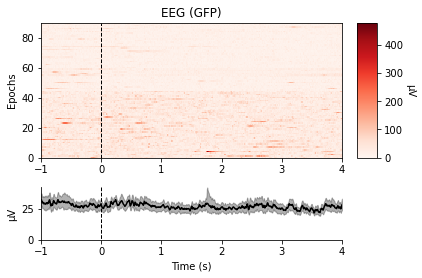

[<Figure size 432x288 with 3 Axes>]

In [31]:
epochs.plot_image()

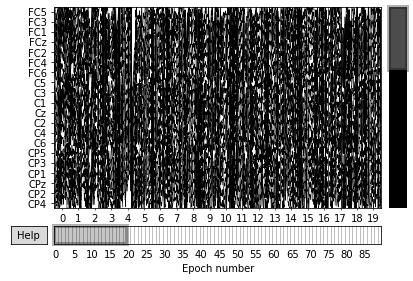

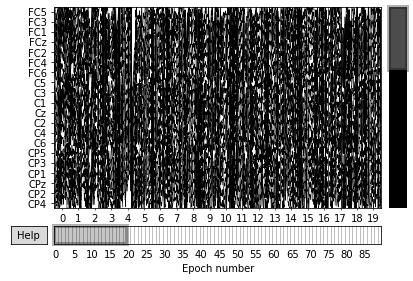

In [32]:
epochs_1sec.plot()

    Using multitaper spectrum estimation with 7 DPSS windows


/tmp/ipykernel_226/3323522178.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs_1sec.plot_psd(fmax=35)   # Are we observing SMR in the plot below??


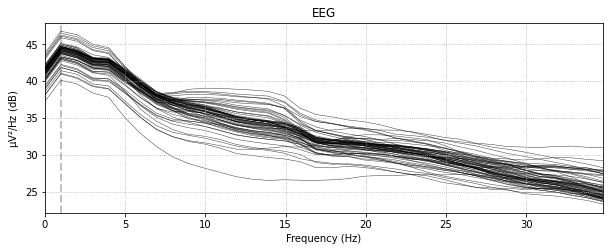

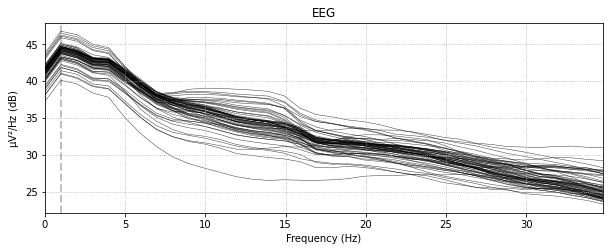

In [33]:
epochs_1sec.plot_psd(fmax=35)   # Are we observing SMR in the plot below??

In [34]:
montage = mne.channels.make_standard_montage('standard_1005')
epochs.set_montage(montage)

Number of events,90
Events,T1: 45T2: 45
Time range,-1.000 – 4.000 sec
Baseline,off


    Using multitaper spectrum estimation with 7 DPSS windows


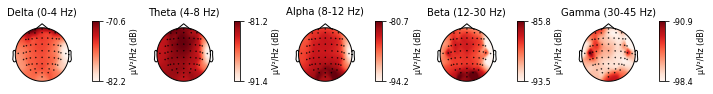

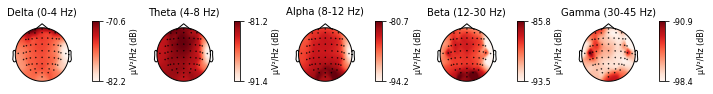

In [35]:
epochs.plot_psd_topomap()

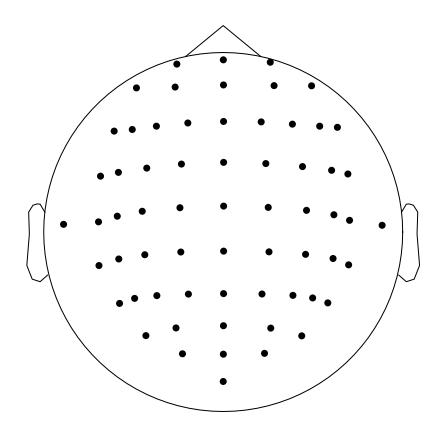

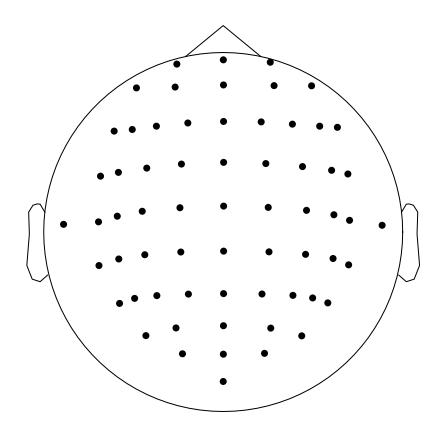

In [36]:
epochs.plot_sensors()

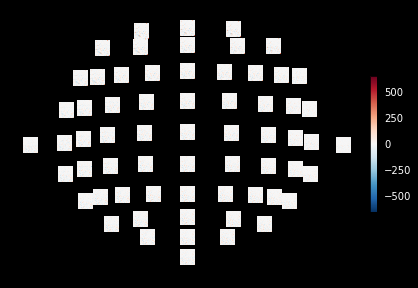

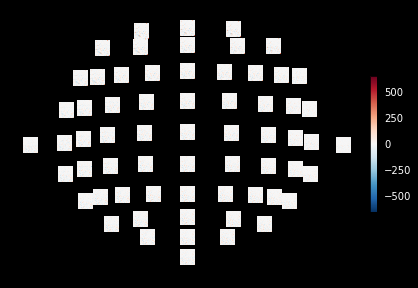

In [37]:
epochs.plot_topo_image()

In [38]:
epochs

Number of events,90
Events,T1: 45T2: 45
Time range,-1.000 – 4.000 sec
Baseline,off


In [39]:
epochs_1sec

Number of events,90
Events,T1: 45T2: 45
Time range,1.000 – 2.000 sec
Baseline,off


# X and y Extraction

From previous preprocessing procedures, this section will extract the data form into general ML being able to read and train the model. The way to define X and y is that events are the labels (y) and X are the data of epochs. So, to see the event, we print out the event by

In [40]:
epochs.events

array([[   672,      0,      3],
       [  2000,      0,      2],
       [  3328,      0,      2],
       [  4656,      0,      3],
       [  5984,      0,      2],
       [  7312,      0,      3],
       [  8640,      0,      3],
       [  9968,      0,      2],
       [ 11296,      0,      2],
       [ 12624,      0,      3],
       [ 13952,      0,      3],
       [ 15280,      0,      2],
       [ 16608,      0,      2],
       [ 17936,      0,      3],
       [ 19264,      0,      3],
       [ 20672,      0,      2],
       [ 22000,      0,      3],
       [ 23328,      0,      3],
       [ 24656,      0,      2],
       [ 25984,      0,      3],
       [ 27312,      0,      2],
       [ 28640,      0,      2],
       [ 29968,      0,      3],
       [ 31296,      0,      3],
       [ 32624,      0,      2],
       [ 33952,      0,      2],
       [ 35280,      0,      3],
       [ 36608,      0,      3],
       [ 37936,      0,      2],
       [ 39264,      0,      3],
       [ 4

However, events that mentioned before are

In [41]:
event_id

{'T1': 2, 'T2': 3}

To make it to be 0 and 1 class, we substract directly the events by

In [42]:
labels = epochs.events[:,-1] - 2  # Convert from 2,3 to 0,1 and assign to labels for training

Then, we got the y like this

In [43]:
labels[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

For X, we could extract <code>get_data()</code> method from epochs by

In [44]:
data = epochs.get_data()
data.shape# 90 events (or samples), 64 channels (or electrodes) and 801 readings

(90, 64, 801)

The data will be composed of shape as mentioned

# Downsampling (Optional)

We downsample the epochs data by a factor of 2. This gives us a sampling frequency of 80Hz, which is half of original sampling frequency 160Hz. As we have applied a low pass filter of 35Hz on our signal, this passes the Nyquist criterion of sampling frequency = 2*bandwidth = 70Hz < 80Hz. i.e sampling frequency is greater than that required to prevent aliasing. Downsampling is done to minimize computation requirements.

In this case, in order to downsample from the original sampling frequency, we need to define a low pass filter of max. frequency 40Hz. The Gamma activity occurs in the frequency band > 30Hz and contributes to sensorimotor rythm. We are excluding possible information from Gamma activity patterns by downsampling our data. This is a loss of information versus computational cost issue and the right answer depends on the circumstances. We may revisit this if we do not get desirable results from our model.  

To downsample, we can apply <code>decimate</code> to the epoch directly. the parameter of the function is interger of divider subset of the data. below example is defined 2, means the data will be subset to 2 times

In [45]:
epochs = epochs.decimate(2)
epochs.get_data().shape         # 90 events (or samples), 64 channels (or electrodes) and 401 readings

/tmp/ipykernel_226/2145889683.py:1: RuntimeWarning: The measurement information indicates a low-pass frequency of 35 Hz. The decim=2 parameter will result in a sampling frequency of 80 Hz, which can cause aliasing artifacts.
  epochs = epochs.decimate(2)


(90, 64, 401)

The result showed that from raw epoch was 801 signal samples. After downsanple, there was 401 signal samples.

#### We finally get our independant and target variables for training

In [46]:
X = epochs.get_data()
y = labels
X.shape

(90, 64, 401)

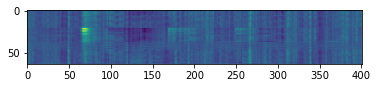

In [47]:
import matplotlib.pyplot as plt
plt.imshow(X[0])

### Further Tasks

Given X and y, perform Binary Classification to correctly identify an event as T1 or T2. 

<p>T1 = Clenching Fists  (Real or imagining)</p>
T2 = Moving Feet      (Real or imagining)

**Possible methods which may be used:**
1. Logistic Regression (Linearly separable data only)
2. State Vector Machines (RBF kernel ?)
3. Linear Discriminant Analysis
4. CNNs (High chance)
5. RNNs (Try)

**We may also try Feature Engineering and Selection to improve accuracy of our model.**
1. Artifact Handling using ICA (may be better to let the deep learning model handle it)
2. Common Spatial Patterns Algorithm to extract features
3. Using a subset of functionally-relevant Electrodes (channels)
4. Applying Baseline to the training data to get less noisy signal
5. Short-time Fast Fourier Transform
6. Wavelet Transform